In [1]:
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import ticker

import json
from pathlib import Path

from dacbench.envs.env_utils.function_definitions import Ackley, Rastrigin, Rosenbrock, Sphere

In [36]:
TINY_SIZE = 14
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": BIGGER_SIZE,
    "axes.labelsize": MEDIUM_SIZE,
    "axes.titlesize": BIGGER_SIZE,
    "xtick.labelsize": TINY_SIZE, 
    "ytick.labelsize": TINY_SIZE, 
    "legend.fontsize": TINY_SIZE, 
    "figure.titlesize": BIGGER_SIZE, 
})

In [3]:
# sphere = Rosenbrock()

# # Generate data for plotting
# x = torch.linspace(-2, 2, 100)
# y = torch.linspace(-2, 2, 100)
# X, Y = torch.meshgrid(x, y)
# Z = sphere.objective_function([X, Y])

# # Plotting
# plt.figure(figsize=(10, 8))
# ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# # Customize plot appearance with seaborn
# sns.set_theme(style='whitegrid')  # Example of using seaborn for style
# # plt.ticklabel_format(axis="z", style="sci", scilimits=(0, 0))
# ax.set_zscale('log')
# ax.set_title('Sphere Function')
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Objective Value')

# plt.show()
# # plt.savefig(Path("starting_points.pdf"), bbox_inches="tight")

In [37]:
def make_countour_plots(function_name: str, ax: plt.Axes):
    if function_name == "Ackley":
        function = Ackley()
    elif function_name == "Rastrigin":
        function = Rastrigin()
    elif function_name == "Rosenbrock":
        function = Rosenbrock()
    elif function_name == "Sphere":
        function = Sphere()


    config_path = Path(f"../configs/environment/ToySGD/{function_name}_default.json")
    with Path.open(config_path) as file:
        env_info = json.load(file)
    function_name = env_info["function"]
    lower_bound = env_info["low"]
    upper_bound = env_info["high"] 


    if function_name == "Rosenbrock":
        contour_levels = np.logspace(-2, 3.6, 30)
    else:
        contour_levels = 10

    # Generate data for plotting
    x = torch.linspace(lower_bound, upper_bound, 100)
    y = torch.linspace(lower_bound, upper_bound, 100)
    X, Y = torch.meshgrid(x, y)
    Z = function.objective_function([X, Y])

    # Plotting
    # plt.figure(figsize=(8, 6))

    # Contour plot
    contour = ax.contourf(X, Y, Z, cmap='viridis', levels=contour_levels, locator=(ticker.LogLocator() if function_name == "Rosenbrock" else ticker.MaxNLocator()))
    if function_name == "Rosenbrock":
        colorbar_levels = np.array([10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3,])
        plt.colorbar(contour, label='Objective Value', ticks=colorbar_levels, ax=ax)
    else:
        plt.colorbar(contour, label="Objective Value", ax=ax)

    # Optional contour lines
    # additional_levels = np.arange(1000, 4000, 1000)
    # contour_lines = plt.contour(X, Y, Z, levels=additional_levels, colors='white')
    # plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%d')

    # Customize plot appearance with seaborn
    ax.set_title(f"{function_name}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')


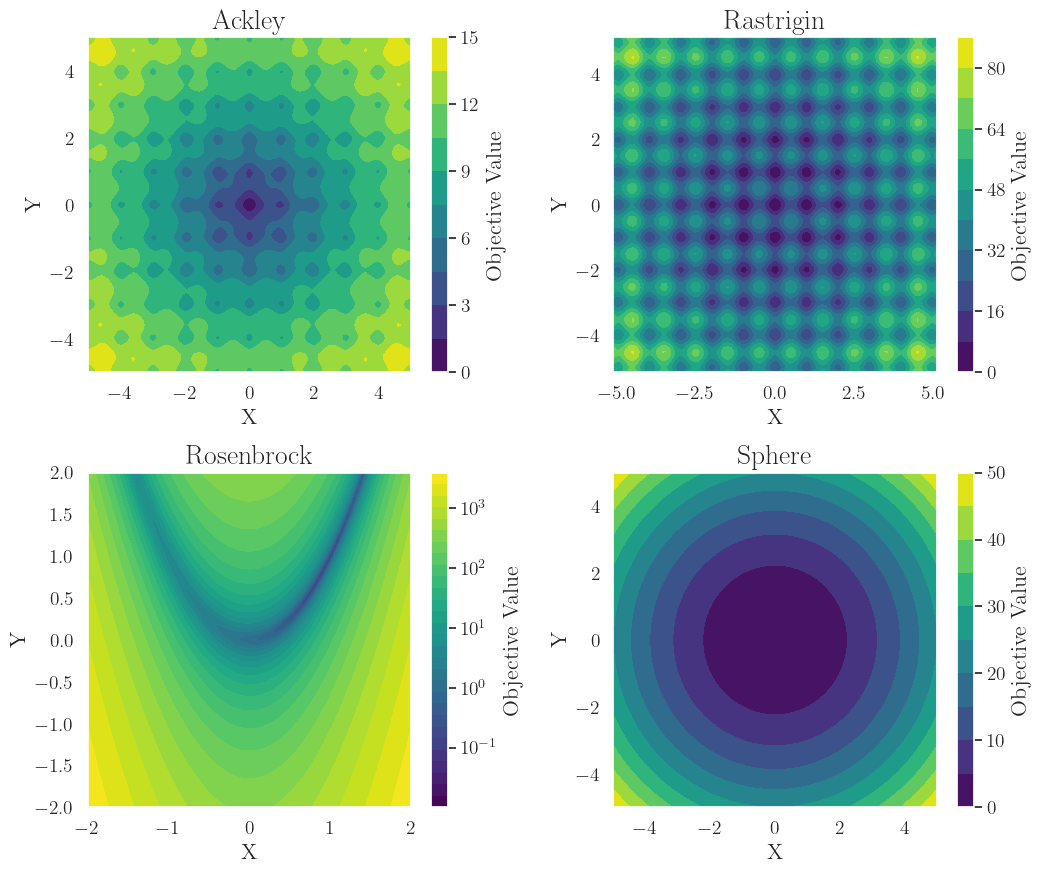

In [39]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# List of functions to plot
functions = ['Ackley', 'Rastrigin', 'Rosenbrock', 'Sphere']

# Plot each function in a separate subplot
for i, function_name in enumerate(functions):
    row = i // 2
    col = i % 2
    make_countour_plots(function_name, axs[row, col])

plt.savefig(Path("objective_functions.pdf"), bbox_inches="tight")